In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
from datetime import datetime
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
#importing the dataset
tweet = pd.read_csv('/kaggle/input/squid-game-netflix-twitter-data/tweets_v8.csv')

In [4]:
tweet.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [5]:
#shape of the dataset
tweet.shape

(80019, 12)

In [6]:
#checking whether the datsset contains the null values or not
tweet.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [7]:
#dropping unnecessary columns
tweet.dropna(subset = 'user_name', inplace= True)

In [8]:
#dropping the duplicate values of the dataset
tweet = tweet.drop_duplicates()

In [9]:
#approximately 500 values have been dropped
tweet.shape

(79573, 12)

In [10]:
tweet['user_location'].nunique()

18235

In [11]:
#the location is little messed up, here value_counts =1 values don't have any locations in the world map
tweet['user_location'].value_counts()

Los Angeles, CA    895
London, England    713
United States      695
India              672
USA                629
                  ... 
Tal'Dorei            1
your dreams.         1
Right Here           1
Raftel               1
Murcia Spain         1
Name: user_location, Length: 18235, dtype: int64

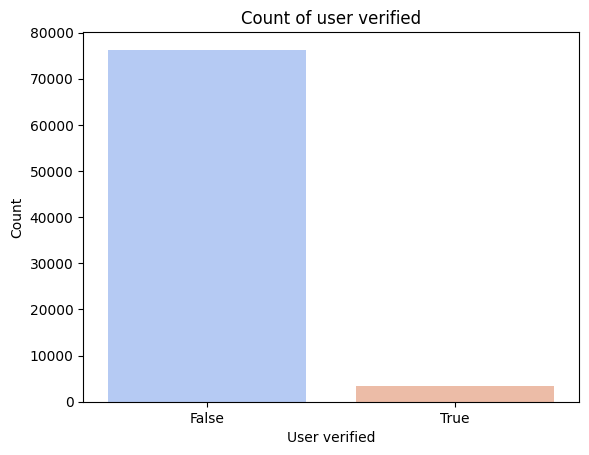

In [12]:
#countplot whether the users are verified or not
sns.countplot(x = 'user_verified', data = tweet, palette='coolwarm')
plt.title('Count of user verified')
plt.xlabel('User verified')
plt.ylabel('Count')
plt.show()

In [13]:
tweet['source'].nunique()

260

In [14]:
#source has so many values, some sources are bots as well.
tweet['source'].unique()

array(['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone',
       'Buffer', 'Twitter for iPad', 'PromoRepublic', 'TweetDeck',
       'Instagram', 'Sprout Social', 'Hootsuite Inc.', 'Tweetbot for iΟS',
       'dlvr.it', 'Meltwater Social', 'Twitter for Mac',
       'SocialHub by maloon', 'Sprinklr', 'Emplifi', 'Agorapulse app',
       'Zoho Social', 'SocialFlow', 'Echobox', 'Blog2Social APP',
       'Twitter for Advertisers', 'IFTTT', 'Metricool',
       'Twitter Media Studio', 'Libsyn On-Publish', 'tweetpancake',
       'Microsoft Power Platform', 'Echofon', 'Oops Bot', 'WordPress.com',
       'Twitterrific for iOS', 'LaterMedia', 'BizToc',
       'Streamlabs Twitter', 'Podbean Podcast', 'Flamingo for Android',
       'CoSchedule', 'Hypefury', 'Twitter for  iPhone', 'SmarterQueue',
       'Nintendo Switch Share', 'Tweetlogix', 'TweetCaster for Android',
       'TwitPane for Android', 'Vero - True Social', 'TheWrap',
       'Periscope', 'popsugar.com', 'Fenix 2', 'Loomly', '

In [15]:
tweet['source'].value_counts().head(20)

Twitter for iPhone      31396
Twitter for Android     24502
Twitter Web App         16432
Twitter for iPad         1544
TweetDeck                1193
Instagram                 718
Hootsuite Inc.            447
SocialRabbit Plugin       400
Buffer                    369
Sprout Social             163
dlvr.it                   159
Revive Social App         141
IFTTT                     126
LaterMedia                119
SocialFlow                104
Twitter Media Studio       92
WordPress.com              90
Tweetbot for iΟS           86
Zoho Social                54
lucy's microwave           49
Name: source, dtype: int64

In [16]:
def change(application):
    application = application.lower()
    if ('iphone' in application) or ('ipad' in application) or ('ios' in application):
        return 'iPhone/iPad'
    elif ('android' in application) or ('mobile' in application):
        return 'Android'
    elif ('app' in application):
        return 'App'
    elif ('bot' in application) or ('auto' in application) or ('.io' in application):
        return 'Bot'
    else:
        return 'Others'

In [17]:
tweet['source'] = tweet['source'].apply(change)

In [18]:
tweet.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",App,False


Text(0, 0.5, 'Count')

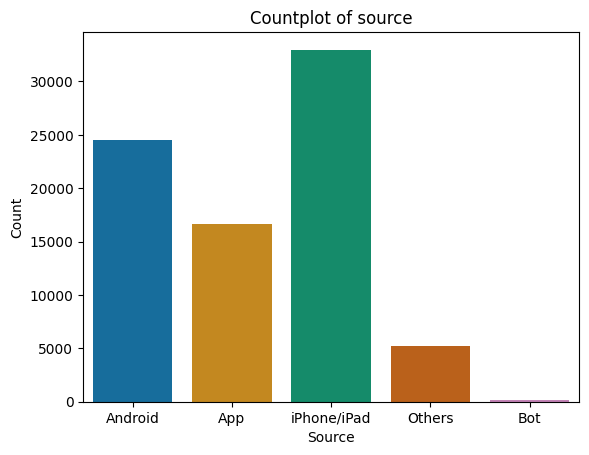

In [19]:
#countplot of source
sns.countplot(x = 'source', data = tweet, palette = 'colorblind')
plt.title('Countplot of source')
plt.xlabel('Source')
plt.ylabel('Count')

In [20]:
#removing all the stopwords, punctuations
def cleaning(review):
    nopunc = [line for line in review if line not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.split()
    reviews = [word for word in nopunc if word.lower() not in stopwords.words('english')]
    return ' '.join(reviews)

In [21]:
tweet['text'] = tweet['text'].apply(cleaning)

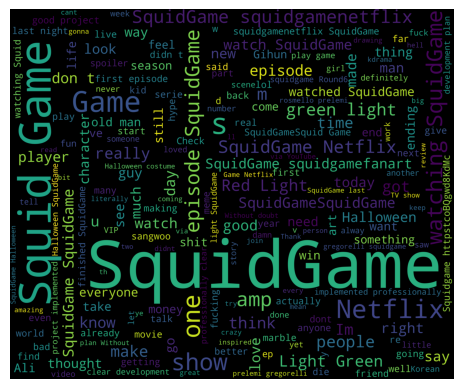

In [22]:
#Wordcloud for reviews
cleaned_plot = WordCloud(background_color='black', stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(tweet['text']))
plt.imshow(cleaned_plot)
plt.axis('off')
plt.show()

In [23]:
#changing the date format from year-month-date hours:minutes:seconds to datemonth
def date_change(dates):
    format = '%Y-%m-%d %H:%M:%S%z'
    dates = datetime.strptime(dates, format).strftime('%d%b')
    return dates

In [24]:
tweet['new_date'] = tweet['date'].apply(date_change)

In [25]:
tweet.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,new_date
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,life hits time poverty strikes Gong Yoo Lets p...,Android,False,06Oct
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,marble episode SquidGame ruined 😭😭😭,Android,False,06Oct
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,Squidgame time,App,False,06Oct
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,Blood 1st slide Im joining squidgame thing Im ...,App,False,06Oct
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,two first games players killed mask guys blood...,App,False,06Oct


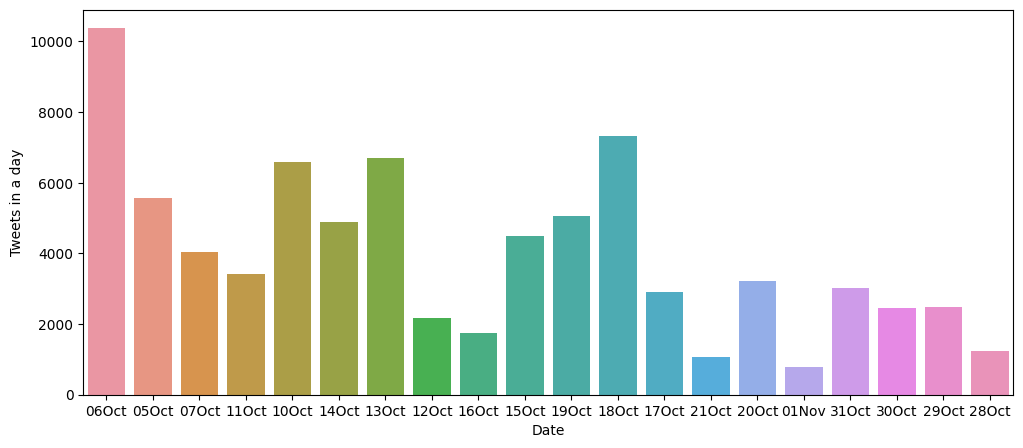

In [26]:
#countplot for tweets tweeted in a day
plt.figure(figsize = (12,5))
sns.countplot(x= 'new_date', data = tweet)
plt.xlabel('Date')
plt.ylabel('Tweets in a day')
plt.show()

In [27]:
tweets1 = " ".join(tweet[tweet['new_date'] == '18Oct']['text'])
tweets2 = " ".join(tweet[tweet['new_date'] == '28Oct']['text'])

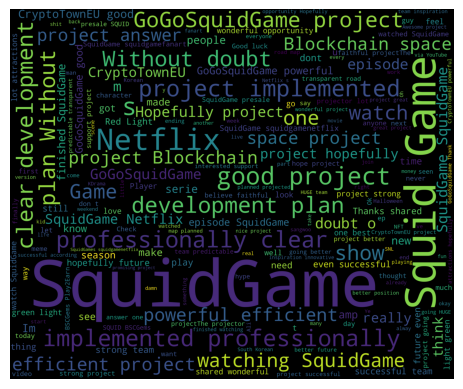

In [28]:
#wordcloud for 18Oct
plot = WordCloud(background_color='black', stopwords=STOPWORDS, width=3000, height=2500).generate(tweets1)
plt.imshow(plot)
plt.axis('off')
plt.show()

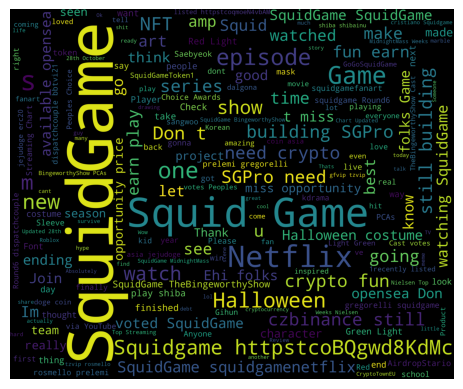

In [29]:
#wordcloud for 18Oct
plot = WordCloud(background_color='black', stopwords=STOPWORDS, width=3000, height=2500).generate(tweets2)
plt.imshow(plot)
plt.axis('off')
plt.show()

# TextBlob is a Python library and can determine the sentiment of a piece of text as positive, negative, and neutral.

In [30]:
#determining the polarity of sentiments
def sentiment(texts):
    text = TextBlob(texts)
    if text.sentiment.polarity > 0:
        return 1
    elif text.sentiment.polarity < 0:
        return -1
    else:
        return 0

In [31]:
tweet['sentiment_polarity'] = tweet['text'].apply(sentiment)

In [32]:
tweet.head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,new_date,sentiment_polarity
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,life hits time poverty strikes Gong Yoo Lets p...,Android,False,06Oct,-1
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,marble episode SquidGame ruined 😭😭😭,Android,False,06Oct,0
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,Squidgame time,App,False,06Oct,0
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,Blood 1st slide Im joining squidgame thing Im ...,App,False,06Oct,-1
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,two first games players killed mask guys blood...,App,False,06Oct,-1
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,False,2021-10-06 12:04:54+00:00,THG Going explode 4B Marketcap soon world firs...,Android,False,06Oct,-1
6,Aeriaaaa♡,NaN,Fujoshi 🙈/ Thai BL-obsessed/Always distracted ...,2021-06-01 14:08:10+00:00,14,110,518,False,2021-10-06 12:04:45+00:00,BhundredHyun pls use gun 😩 BAEKHYUN EXO weareo...,Android,False,06Oct,0
7,BarBiE Fábregas 🇿🇦,South Africa,Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...,2011-03-28 18:56:28+00:00,1877,2057,33186,False,2021-10-06 12:04:26+00:00,Please vote daily poll Thanks 😊 think Donny va...,iPhone/iPad,False,06Oct,1
8,Joel D. Parker,NaN,Ph.D. in history of 20th century Levant. Somet...,2010-07-01 07:26:44+00:00,621,1346,5345,False,2021-10-06 12:04:22+00:00,Ive seen bilingual Korean speakers slam SquidG...,App,False,06Oct,0
9,Kevin Franco,"Calgary, Canada",When it comes to describing myself in a one li...,2009-05-11 20:14:51+00:00,1027,278,20902,False,2021-10-06 12:04:10+00:00,discovered English audio 5 episodes Squid Game...,App,False,06Oct,-1


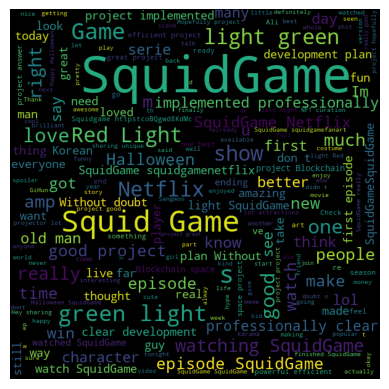

In [33]:
#wordcloud for sentiment polarity =1
positive = ''.join(tweet[tweet['sentiment_polarity'] == 1]['text'])
plot1 = WordCloud(background_color= 'black', width = 600, height = 600, stopwords= STOPWORDS).generate(positive)
plt.imshow(plot1)
plt.axis('off')
plt.show()

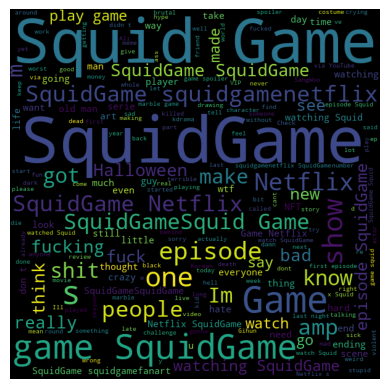

In [34]:
#wordcloud for sentiment polarity =-1
negative = ''.join(tweet[tweet['sentiment_polarity'] == -1]['text'])
plot2 = WordCloud(background_color= 'black', width = 600, height = 600, stopwords= STOPWORDS).generate(negative)
plt.imshow(plot2)
plt.axis('off')
plt.show()

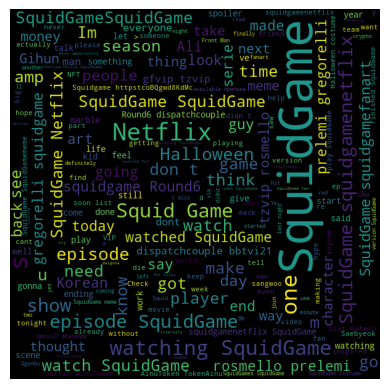

In [35]:
#wordcloud for sentiment polarity =0
neutral = ''.join(tweet[tweet['sentiment_polarity'] == 0]['text'])
plot3 = WordCloud(background_color= 'black', width = 600, height = 600, stopwords= STOPWORDS).generate(neutral)
plt.imshow(plot3)
plt.axis('off')
plt.show()

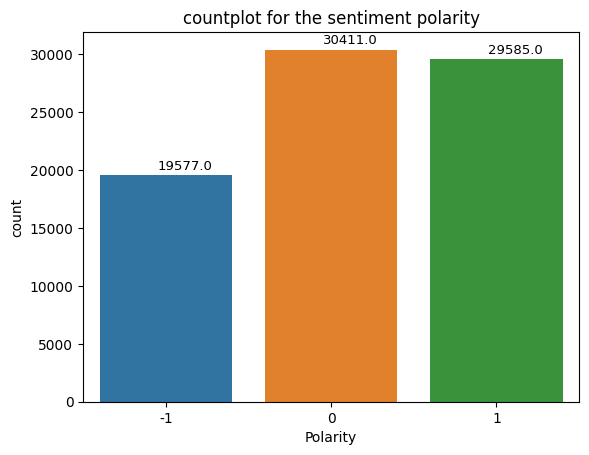

In [36]:
#countplot for the sentiment polarity
count = sns.countplot(x = 'sentiment_polarity', data = tweet)
plt.title('countplot for the sentiment polarity')
plt.xlabel('Polarity')
for value in count.patches:
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height() + 500
    count.annotate(value.get_height(), (x, y), size = 9.5)

In [37]:
def score(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 1
    elif score['compound'] <= -0.05:
        return -1
    else:
        return 0

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
tweet['sentiment'] = tweet['text'].apply(score)

In [40]:
tweet.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,new_date,sentiment_polarity,sentiment
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,life hits time poverty strikes Gong Yoo Lets p...,Android,False,06Oct,-1,-1
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,marble episode SquidGame ruined 😭😭😭,Android,False,06Oct,0,-1
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,Squidgame time,App,False,06Oct,0,0
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,Blood 1st slide Im joining squidgame thing Im ...,App,False,06Oct,-1,-1
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,two first games players killed mask guys blood...,App,False,06Oct,-1,-1


Text(0.5, 0, 'Sentiments')

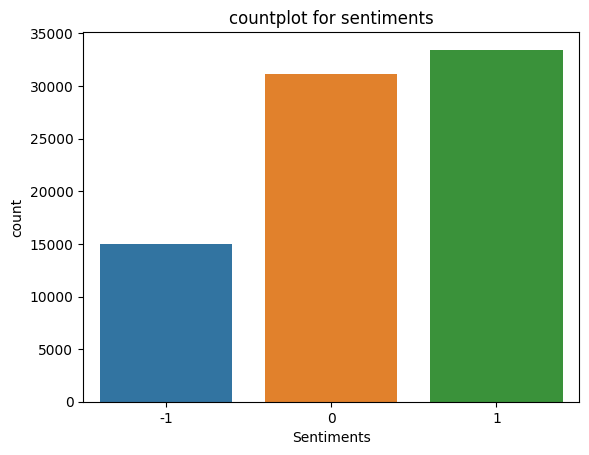

In [41]:
#countplot for sentiments
sns.countplot(x = 'sentiment', data = tweet)
plt.title('countplot for sentiments')
plt.xlabel('Sentiments')

In [42]:
x = tweet['text']
y = tweet['sentiment']

In [43]:
#creating an object for TfidfVectorize
vector = TfidfVectorizer()

In [44]:
x = vector.fit_transform(x)

In [45]:
#splitting x, y for training, testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# **Logistic Regression**

In [46]:
log = LogisticRegression()

In [47]:
log.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
pred1 = log.predict(x_test)

In [49]:
print('The accuracy score for logistic regression is: ',accuracy_score(pred1, y_test))

The accuracy score for logistic regression is:  0.884574300973924


In [50]:
print(classification_report(pred1, y_test))

              precision    recall  f1-score   support

          -1       0.69      0.90      0.78      2304
           0       0.96      0.85      0.90      6989
           1       0.91      0.92      0.91      6622

    accuracy                           0.88     15915
   macro avg       0.85      0.89      0.86     15915
weighted avg       0.90      0.88      0.89     15915



In [51]:
svm = SVC(C=1.0, kernel='linear', gamma=100)

# **SVM**

In [52]:
svm.fit(x_train, y_train)

SVC(gamma=100, kernel='linear')

In [53]:
pred2 = svm.predict(x_test)

In [54]:
print('The accuracy score for SVM is: ',accuracy_score(pred2, y_test))

The accuracy score for SVM is:  0.9158027018535972


In [55]:
print(classification_report(pred2, y_test))

              precision    recall  f1-score   support

          -1       0.80      0.89      0.84      2703
           0       0.96      0.91      0.93      6538
           1       0.93      0.93      0.93      6674

    accuracy                           0.92     15915
   macro avg       0.90      0.91      0.90     15915
weighted avg       0.92      0.92      0.92     15915



In [56]:
lsvc = LinearSVC()

In [57]:
lsvc.fit(x_train, y_train)

LinearSVC()

In [58]:
pred3 = lsvc.predict(x_test)

In [59]:
print("The accuracy for LinearSVC is:", accuracy_score(pred3, y_test))

The accuracy for LinearSVC is: 0.9148601947847942


In [60]:
print(classification_report(pred3, y_test))

              precision    recall  f1-score   support

          -1       0.80      0.90      0.84      2678
           0       0.96      0.91      0.93      6554
           1       0.93      0.93      0.93      6683

    accuracy                           0.91     15915
   macro avg       0.89      0.91      0.90     15915
weighted avg       0.92      0.91      0.92     15915



# **SVM model predicts around 91% accuracy.**